<center><img src='./Figs/cs-logo.png' width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>LAB 4 : Detecteur de Harris et création de panorama </center>
<hr style=" border:none; height:3px;">
</h1>




L'objectif de ce TP est de mettre au point votre propre détecteur de points d'intérêts en suivant la méthode de Harris (c.f. cours).

## Exercice 1 : calcul du critère de Harris
Il s'agit ici d'écrire une fonction ou un ensemble de fonctions permettant de renvoyer la carte des coins de Harris $ H = det C - \alpha (trace C)^{2}$ à partir d'une image donnée et pour une échelle donnée (taille de la fenêtre). On prendra $\alpha = 0.04$.

Process:
1. Color image to Grayscale conversion
2. Spatial derivative calculation
3. Structure tensor setup
4. Harris response calculation
5. Find edges and corners using R

### Etape 1
Calcul de $I_{x}$ et $I_{y}$ gradient en $x$ et en $y$ d'une image lissée à l'aide de l'opérateur de Sobel.

In [224]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

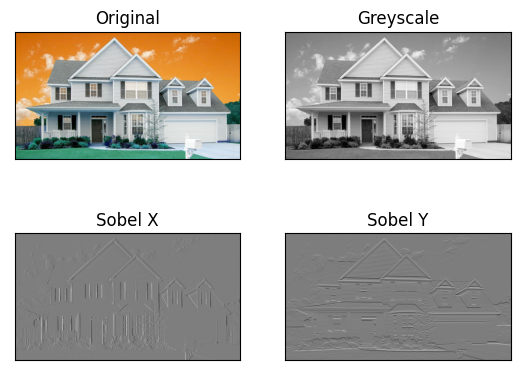

In [225]:
kernel_size = 5
sigma = 1.4

img = cv2.imread('./Data/house.jpg', 1)
img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_gray,cmap = 'gray')
plt.title('Greyscale'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

### Etape 2
Calcul de $I_{x}^{2}$, $I_{x}^{2}$ et $I_{xy}= I_{x} \times I_{y}$

In [226]:
sobelxx = sobelx**2
sobelyy = sobely**2
sobelxy = sobelx * sobely

### Etape 3
Lisser avec un filtre gaussien de taille $N$ chacune des images précédentes.

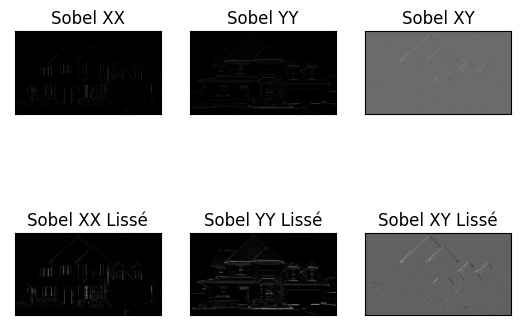

In [227]:
sobelxx_liss = cv2.GaussianBlur(sobelxx, (5,5), 1.4, 1.4, cv2.BORDER_DEFAULT)
sobelyy_liss = cv2.GaussianBlur(sobelyy, (5,5), 1.4, 1.4, cv2.BORDER_DEFAULT)
sobelxy_liss = cv2.GaussianBlur(sobelxy, (5,5), 1.4, 1.4, cv2.BORDER_DEFAULT)

plt.subplot(2,3,1),plt.imshow(sobelxx,cmap = 'gray')
plt.title('Sobel XX'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(sobelyy,cmap = 'gray')
plt.title('Sobel YY'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelxy,cmap = 'gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,4),plt.imshow(sobelxx_liss,cmap = 'gray')
plt.title('Sobel XX Lissé'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(sobelyy_liss,cmap = 'gray')
plt.title('Sobel YY Lissé'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(sobelxy_liss,cmap = 'gray')
plt.title('Sobel XY Lissé'), plt.xticks([]), plt.yticks([])

plt.show()

### Etape 4
En chaque pixel, calculer la fonction de Harris :$ H = det C - \alpha (trace C)^{2}$ avec $\alpha = 0.04$


In [228]:
k = 0.04

# determinant
detA = sobelxx_liss * sobelyy_liss - sobelxy_liss ** 2
# trace
traceA = sobelxx_liss + sobelyy_liss
    
harris_response = detA - k * traceA ** 2
harris_response

array([[ 9.44986325e+07,  1.18195415e+08,  1.13329683e+08, ...,
         2.11696701e+07,  4.34146527e+07,  5.65525345e+07],
       [ 1.43160682e+08,  1.67944974e+08,  1.53297911e+08, ...,
         1.82267189e+07,  3.81022138e+07,  4.94495909e+07],
       [ 1.54241529e+08,  1.75078605e+08,  1.58972717e+08, ...,
         1.22682883e+07,  2.57636631e+07,  3.32398999e+07],
       ...,
       [ 1.09643869e+07,  3.25109203e+07,  1.62017355e+08, ...,
        -2.68371313e+08, -4.10591474e+08, -4.78487876e+08],
       [ 6.43300686e+06,  1.25365033e+07,  4.20589602e+07, ...,
         9.32482183e+05, -7.18709464e+07, -1.09490349e+08],
       [ 1.84940763e+06,  3.33443241e+06,  8.60266171e+06, ...,
         9.41695298e+06,  5.46662177e+06,  2.90439893e+06]])

Appliquer sur l'image de maison et afficher l'image $H$. 

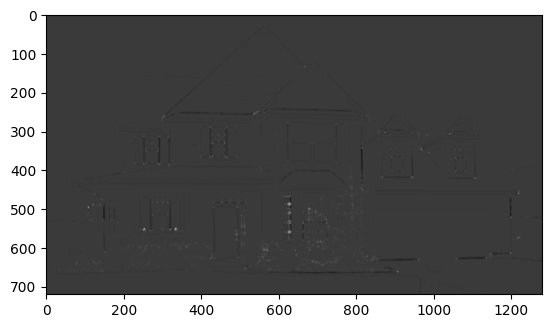

In [229]:
plt.imshow(harris_response, cmap = 'gray')
plt.show()

## Exercice 2 : détection des coins

Il s'agit ici de mettre en place les fonctions pour détecter les coins à partir de la carte des coins construite dans la partie précédente.

Ecrire une fonction permettant de binariser la carte des coins par une opération de seuillage.

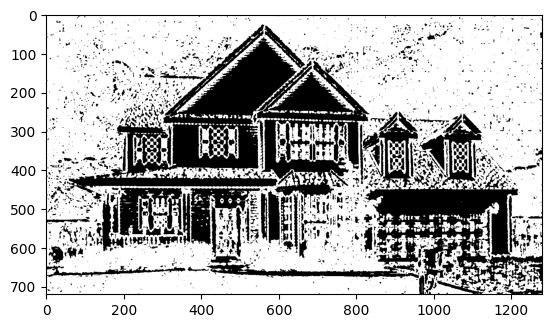

In [230]:
img_copy_for_corners = np.copy(img_gray)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = 255
        else:
            img_copy_for_corners[rowindex, colindex] = 0

plt.imshow(img_copy_for_corners, cmap = 'gray')
plt.show()

Ecrire une fonction permettant d'extraire les maxima locaux sur un voisinage $3 \times 3$ (mettre à 0 dans l'image binarisée tous les points  dont la valeur n'est pas supérieure à celle des 8 voisins ) 

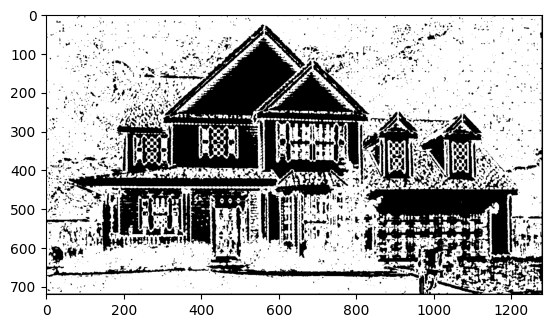

In [231]:
def non_maximum_suppression(G):
    H, W = G.shape
    out = np.zeros((H, W))

    for i in range(1, H-1):
        for j in range(1, W-1):
            # note here the angle is measured clockwisely
            neighbors = [
                G[i-1, j-1],
                G[i-1, j],
                G[i-1, j+1],
                G[i, j-1],
                G[i, j+1],
                G[i+1, j-1],
                G[i+1, j],
                G[i+1, j+1]
            ]
            for neighbor in neighbors:
                if G[i, j] < neighbor:
                    out[i, j] = 0
                    break
            else:
                out[i, j] = G[i, j]

    return out

max_gradient = non_maximum_suppression(img_copy_for_corners)

plt.imshow(max_gradient, cmap = 'gray')
plt.show()

Ecrire une fonction permettant d'afficher les points détectés en dessinant une croix blanche en chaque point sur l'image originale.

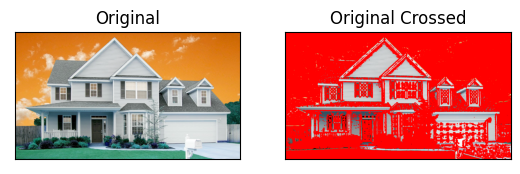

In [232]:
def croix(original, G):
    H, W = G.shape

    for i in range(1, H-1):
        for j in range(1, W-1):
            if G[i, j] > 0:
                cv2.line(original, (j-1, i-1), (j+1, i+1), (255, 0, 0), 1)
                cv2.line(original, (j+1, i-1), (j-1, i+1), (255, 0, 0), 1)
    return original


img_for_cross = img.copy()
img_crossed = croix(img_for_cross, max_gradient)

plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img_crossed)
plt.title('Original Crossed'), plt.xticks([]), plt.yticks([])

plt.show()

Appliquer sur l'image de maison

## Exercice 3
Plusieurs fonctions sont disponibles dans OpenCV pour le calcul de points d'intérêts. :
+ [cornerHarris](http://docs.opencv.org/3.2.0/dc/d0d/tutorial_py_features_harris.html)
+ [cornerSubPix](http://docs.opencv.org/3.2.0/dc/d0d/tutorial_py_features_harris.html)
+ [goodFeaturesToTrack](http://docs.opencv.org/3.2.0/d4/d8c/tutorial_py_shi_tomasi.html) qui correspond à l'approche de Shi Tomasi
+ [SIFT](http://docs.opencv.org/3.2.0/da/df5/tutorial_py_sift_intro.html)

Documentez vous sur ces différentes fonctions et utilisez les pour calculer des points d'intérêts sur différentes images et notamment l'image (les images) utilisées dans la première partie de ce TP.



## Exercice 4 : création de panorama

L'objectif de cet exercice est de créer un panorama à partir de plusieurs images, en utilisant les principales notions vues en cours.

Le principe est relativement simple et suit l'approche vue en cours :

 + Une première étape est de décider quelle sera votre image source et quelles seront vos images destination (i.e les images que vous voulez mettre en correspondance avec votre image source).
 
 + Une fois l'image source choisie, une technique pour la création de panorama est de placer cette image dans un plus gros canevas (image de plus grande taille dont les pixels non connus seront mis à noir). La fonction [**warpAffine**]( https://docs.opencv.org/3.4.0/da/d6e/tutorial_py_geometric_transformations.html) d'OpenCV pourrait être utilisée pour cela.

 + L'étape d'après consiste à la détection et à la description d'un ensemble de points caractéristiques pour l'image cible transformée et l'ensemble des images destination. Vous pourrez pour cela utiliser les descripteurs [SIFT](https://docs.opencv.org/3.3.0/da/df5/tutorial_py_sift_intro.html).
 
 + Il s'agira ensuite de mettre en correspondance les descripteurs de l'image source avec ceux de l'image destination. Ici aussi vous pouvez utiliser plusieurs outils de [matching](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html) fournis par la bibliothèque OpenCV.
 
 + Seuls les 200 meilleures mises en correspondance seront gardées pour la suite.
 
 + A partir de ces mises en correspondance, il faut ensuite calculer l'homographie permettant de passer de l'image sources à l'image destination. Seuls 4 mises en correspondance sont nécessaire pour calculer cette homographie mais il est usuel d'en utiliser plus avec l'approche RANSAC expliquer très simplement [ici](http://eric-yuan.me/ransac/) et disponible dans Opencv (documentation [ici](https://docs.opencv.org/3.4.0/d9/dab/tutorial_homography.html)) comme un paramètre de la fonction **findHomography**).
 
 + Appliquer l'homographie obtenue à l'image destination.
 
 + Fusionner l'image cible et l'image destination.
 


<center><img src='./Figs/panorama.png'></center>


### Import des fichers utiles

In [233]:
%matplotlib inline
import numpy as np
import cv2 
from matplotlib import pyplot as plt

### Première étape : chargement de vos images et choix de l'image source et des images destinations.

Vous pourrez mettre vos différents images dans le répertoire [`Data`](.\Data).

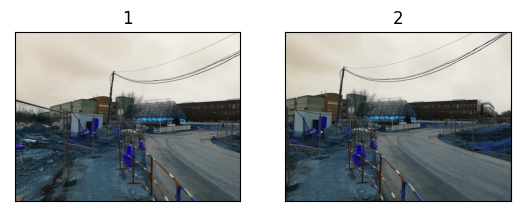

In [234]:
def step1(path1, path2):
    img1 = cv2.imread(path1, 1)
    img2 = cv2.imread(path2, 1)
    return img1, img2

img1, img2 = step1(
    "/Users/cha/Desktop/Code/visual_recognition_mentionia_2023/Lab4/Data/1.jpg",
    "/Users/cha/Desktop/Code/visual_recognition_mentionia_2023/Lab4/Data/2.jpg"
)

plt.subplot(1,2,1),plt.imshow(img1)
plt.title('1'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img2)
plt.title('2'), plt.xticks([]), plt.yticks([])

plt.show()

### Deuxième étape : calcul des points d'intérêts et de leur description

Vous pouvez pour cette étape tester plusieurs des approches existantes et disponibles dans la bibliothèque OpenCV comme :
+ SIFT (scale-invariant feature transform) : voir [ici](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html)
+ SURF (Speeded-Up Robust Features) : très proche de SIFT mais avec une implementation qui permet le calcul des points et des descripteurs de manière rapide (voir [ici](https://docs.opencv.org/master/df/dd2/tutorial_py_surf_intro.html)).
+ ORBFASTBRIEF (Oriented FAST and Rotated BRIEF) est un descripteur binaire rapide basé sur la combinaison du détecteur de points clés FAST (Features from Accelerated Segment Test) et du descripteur BRIEF (Binary robust independent elementary features). Il est invariant en rotation et robuste au bruit. Il a été développé dans les laboratoires OpenCV et constitue une alternative efficace et gratuite à SIFT. (voir [ici](https://docs.opencv.org/4.5.1/d1/d89/tutorial_py_orb.html))

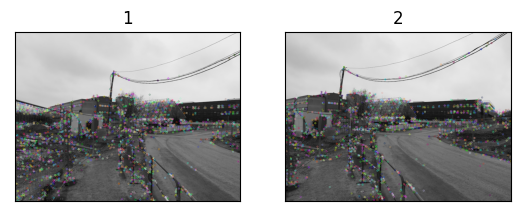

In [235]:
def step2(img1, img2):
    for im in [img1, img2]:
        gray= cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        kp = sift.detect(gray,None)
        im=cv2.drawKeypoints(gray, kp, im)
        cv2.imwrite('sift_keypoints.jpg', im)
    return img1, img2

img1, img2 = step2(img1, img2)

plt.subplot(1,2,1),plt.imshow(img1)
plt.title('1'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img2)
plt.title('2'), plt.xticks([]), plt.yticks([])

plt.show()

### Troisième étape : Recherche des paires correspondantes

Il s'agit maintenant de trouver les paires correspondantes candidates entre deux images. Ici aussi plusieurs approches sont possibles comme par exemple [`BFMatcher.knnMatch`](https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html). Cette approche mesure la distance entre chaque paire de descripteurs de points clés et renvoie pour chaque point clé ses k meilleures correspondances avec la distance minimale.

Il est nécessaire ensuite d'appliquer un filtre de ratio pour ne garder que les correspondances correctes. En effet, pour obtenir une correspondance fiable, les points clés appariés doivent être significativement plus proches que la correspondance incorrecte la plus proche.

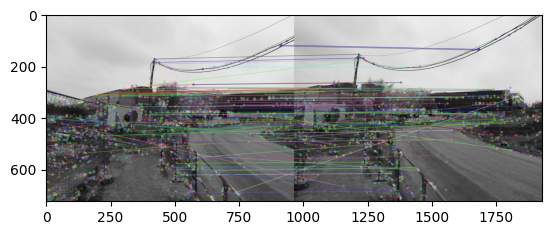

In [236]:
def step3(img1, img2):
    # find the keypoints and descriptors with SIFT
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append([m])

    # cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(
        img1, kp1,
        img2, kp2,
        good,
        None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    return img3, good, kp1, kp2

img3, good, kp1, kp2 = step3(img1, img2)
plt.imshow(img3)
plt.show()

### Quatrième étape : Calcul de l'homographie 

Après avoir fait correspondre au moins quatre paires de points clés, nous pouvons transformer une image par rapport à l'autre. Cette opération est appelée déformation d'image (**image warping**). Deux images d'une même surface plane dans l'espace sont reliées par une homographie. Les homographies sont des transformations géométriques qui ont 8 paramètres libres et sont représentées par une matrice 3x3. Elles représentent toute distorsion apportée à une image dans son ensemble (par opposition aux déformations locales). Par conséquent, pour obtenir l'image détectée transformée, il faut calculer la matrice d'homographie et l'appliquer à l'image détectée.

L'algorithme RANSAC peut etre utiliser pour détecter les valeurs aberrantes et les éliminer avant de déterminer l'homographie finale. Il est directement intégré à la méthode [`findHomography`](https://docs.opencv.org/master/d1/de0/tutorial_py_feature_homography.html) d'OpenCV. 

In [237]:
MIN_MATCH_COUNT = 4

def step4(min_match, good, kp1, kp2):
    if len(good) > min_match:
        src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    else:
        print( "Not enough matches are found - {}/{}".format(len(good), min_match) )
    return M

M = step4(MIN_MATCH_COUNT, good, kp1, kp2)
M

array([[ 1.38871720e+00, -4.35389997e-02, -2.74977632e+02],
       [ 1.44951762e-01,  1.23071363e+00, -9.31490793e+01],
       [ 3.82093861e-04,  1.97121716e-05,  1.00000000e+00]])

### Cinquième étape : déformation des images

Appliquer une transformation de déformation en utilisant la matrice d'homographie obtenue

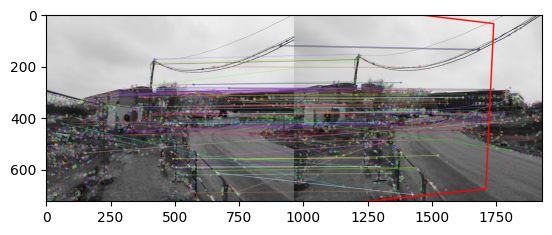

In [238]:
def step5(img1, img2, M):
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    h, w = gray_img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    img3 = cv2.drawMatchesKnn(
        img1, kp1,
        img2, kp2,
        good,
        None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    return img3

img3 = step5(img1, img2, M)
plt.imshow(img3)
plt.show()

Appliquer votre chaîne aux différentes imahes collectées. Que contastez vous? Quels types d'améliorations proposeriez vous ?

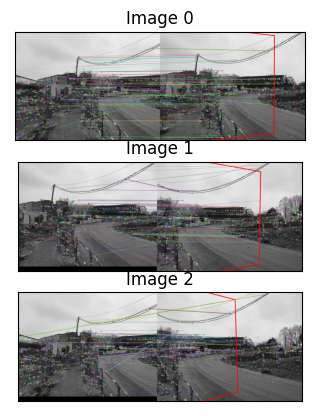

In [240]:
paths = [
    ["/Users/cha/Desktop/Code/visual_recognition_mentionia_2023/Lab4/Data/1.jpg", "/Users/cha/Desktop/Code/visual_recognition_mentionia_2023/Lab4/Data/2.jpg"],
    ["/Users/cha/Desktop/Code/visual_recognition_mentionia_2023/Lab4/Data/2.jpg", "/Users/cha/Desktop/Code/visual_recognition_mentionia_2023/Lab4/Data/3.jpg"],
    ["/Users/cha/Desktop/Code/visual_recognition_mentionia_2023/Lab4/Data/1.jpg", "/Users/cha/Desktop/Code/visual_recognition_mentionia_2023/Lab4/Data/3.jpg"]
]

N_LINES = len(paths)

for i, (path1, path2) in enumerate(paths):
    img1, img2 = step1(path1, path2)
    img1, img2 = step2(img1, img2)
    _, good, kp1, kp2 = step3(img1, img2)
    M = step4(MIN_MATCH_COUNT, good, kp1, kp2)
    img_finale = step5(img1, img2, M)

    plt.subplot(N_LINES, 1, i + 1),plt.imshow(img_finale)
    plt.title(f'Image {i}'), plt.xticks([]), plt.yticks([])

plt.show()

Pour aller plus loin, voir :
+ https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/